In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
%matplotlib inline

In [218]:
inf = pd.read_csv('covtype.csv',header=None)
df,test = train_test_split(inf, test_size=.75)

In [219]:
def ROC_plot(fpr,tpr,n_classes,x, y,z):
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    '''
    plt.plot(x, y,
             #label='micro-average ROC curve (area = {0:0.2f})'
              #     .format(z),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             #label='macro-average ROC curve (area = {0:0.2f})'
                #   .format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    '''
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color)
    return roc_auc["macro"];
                # label='ROC curve of class {0} (area = {1:0.2f})'
                 #.format(i, roc_auc[i]))

'''
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of ROC to multi-class')
    plt.legend(loc="lower right")
'''
    # plt.show()
    


'\n    plt.plot([0, 1], [0, 1], \'k--\')\n    plt.xlim([0.0, 1.0])\n    plt.ylim([0.0, 1.05])\n    plt.xlabel(\'False Positive Rate\')\n    plt.ylabel(\'True Positive Rate\')\n    plt.title(\'Some extension of ROC to multi-class\')\n    plt.legend(loc="lower right")\n'

# 3a)

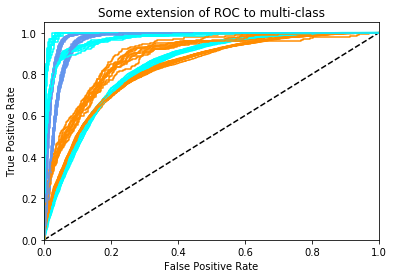

In [220]:
kf = StratifiedKFold(n_splits=10)
X=df.iloc[:,:54]
X=np.array(X)
y_ori=np.array(df[54])
y2=y_ori
n=y_ori.shape[0]
y=y_ori.reshape(n,1)
y=label_binarize(y, classes=[1,2,3,4,5,6,7])
n_classes = 7
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of ROC to multi-class')
macro=0
micro=0
for train_index, test_index in kf.split(X,y2):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    # initialize a logistric regression object
    lr = OneVsRestClassifier(LogisticRegression(C=999))
    # train the model
    lr.fit(X_train,y_train)
    y_score = lr.fit(X_train,y_train).decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    macro_temp=ROC_plot(fpr,tpr,n_classes,fpr["micro"],tpr["micro"],roc_auc["micro"])
    micro+=roc_auc["micro"] 
    macro+=macro_temp
plt.show()
macro=macro/10
micro=micro/10

# 3b)

In [221]:
df,remain = train_test_split(df, test_size=.1)
kf = StratifiedKFold(n_splits=9)
X=df.iloc[:,:54]
X=np.array(X)
y_ori=np.array(df[54])
y2=y_ori
n=y_ori.shape[0]
y=y_ori.reshape(n,1)
y=label_binarize(y, classes=[1,2,3,4,5,6,7])
for K in [1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000]:
    ans=0
    for train_index, test_index in kf.split(X,y2):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        # initialize a logistric regression object
        lr = OneVsRestClassifier(LogisticRegression(C=K))
        # train the model
        lr.fit(X_train,y_train)
        ans_temp=accuracy_score(y_test, lr.predict(X_test))
        ans+=ans_temp
    ans=ans/9
    print("K= {} ".format(K)," accuracy= {}".format(ans))

K= 1e-08   accuracy= 0.24385167497103058
K= 1e-07   accuracy= 0.3961691323175247
K= 1e-06   accuracy= 0.4513987967695248
K= 1e-05   accuracy= 0.4694899459843423
K= 0.0001   accuracy= 0.4993308366350971
K= 0.001   accuracy= 0.578074968811676
K= 0.01   accuracy= 0.6159092031686861
K= 0.1   accuracy= 0.6258613577744419
K= 1   accuracy= 0.629647995349905
K= 10   accuracy= 0.6292498629225484
K= 100   accuracy= 0.6270240939748724
K= 1000   accuracy= 0.625050646400041


# 3c) & e)

K= 1e-08   accuracy= 0.24645463307173343
K= 1e-07   accuracy= 0.405892881729313
K= 1e-06   accuracy= 0.4550461241911056
K= 1e-05   accuracy= 0.4721878011840837
K= 0.0001   accuracy= 0.5070218917802561
K= 0.001   accuracy= 0.5821974390747625
K= 0.01   accuracy= 0.6142090045435771
K= 0.1   accuracy= 0.6230207903070356
K= 1   accuracy= 0.6287346826380283
K= 10   accuracy= 0.6279774197989811
K= 100   accuracy= 0.6288035247143053
K= 1000   accuracy= 0.6261875258157786


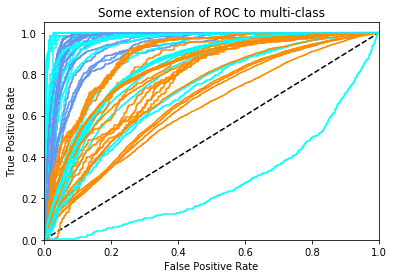

In [222]:
X_test=remain.iloc[:,:54]
X_test=np.array(X_test)
y_test_ori=np.array(remain[54])
n=y_test_ori.shape[0]
y_test=y_test_ori.reshape(n,1)
y_test=label_binarize(y_test, classes=[1,2,3,4,5,6,7])
n_classes=7
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of ROC to multi-class')
for K in [1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000]:
    ans=0
    # initialize a logistric regression object
    lr = OneVsRestClassifier(LogisticRegression(C=K))
    # train the model
    lr.fit(X,y)
    ans_temp=accuracy_score(y_test, lr.predict(X_test))
    ans+=ans_temp
    print("K= {} ".format(K)," accuracy= {}".format(ans))
    y_score = lr.fit(X,y).decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    ROC_plot(fpr,tpr,n_classes,fpr["micro"],tpr["micro"],roc_auc["micro"])
plt.show()

# 3d)

    Accuracy
0   0.246455
1   0.405893
2   0.455046
3   0.472188
4   0.507022
5   0.582197
6   0.614209
7   0.623021
8   0.628735
9   0.627977
10  0.628804
11  0.626188


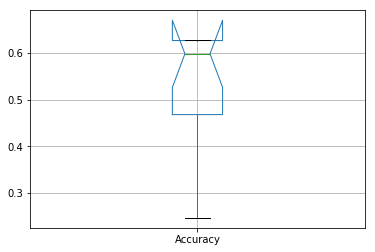

         AUC
0   0.898896
1   0.917921
2   0.928460
3   0.934423
4   0.940122
5   0.949293
6   0.953965
7   0.955381
8   0.955955
9   0.956182
10  0.956160
11  0.955874


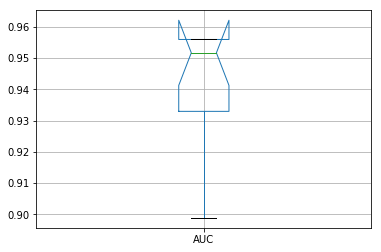

In [223]:
X_test=remain.iloc[:,:54]
X_test=np.array(X_test)
y_test_ori=np.array(remain[54])
n=y_test_ori.shape[0]
y_test=y_test_ori.reshape(n,1)
y_test=label_binarize(y_test, classes=[1,2,3,4,5,6,7])
n=0
accuracy=np.zeros(12)
AUC=np.zeros(12);
for K in [1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000]:
    # initialize a logistric regression object
    lr = OneVsRestClassifier(LogisticRegression(C=K))
    # train the model
    lr.fit(X,y)
    accuracy[n]=accuracy_score(y_test, lr.predict(X_test))
    
    lr = OneVsRestClassifier(LogisticRegression(C=K))
    lr.fit(X,y)
    y_score = lr.fit(X,y).decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(7):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    AUC[n]=roc_auc["micro"]
    n+=1
    
box_df = pd.DataFrame({'Accuracy': accuracy})
print(box_df)
box_df.plot(kind='box', notch=True, grid=True)
plt.show()
box_df = pd.DataFrame({'AUC': AUC})
print(box_df)
box_df.plot(kind='box', notch=True, grid=True)
plt.show()